In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, csvfile in/output
# vizualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import re
import scipy.stats as stats 
import warnings
df2019 = pd.read_csv("2019.csv")
df2019.sample(5)

,Overall rank,Country,Region,Score,GDPpercapita,Socialsupport,HealthylifeExpectancy,Freedom to make life choices,Generosity,Perceptions of corruption
100,101,Jordan,Asia,4.906,0.837,1.225,0.815,0.383,0.110,0.130
127,128,Mali,Africa,4.390,0.385,1.105,0.308,0.327,0.153,0.052
19,20,Czech Republic,Europe,6.852,1.269,1.487,0.920,0.457,0.046,0.036
73,74,Tajikistan,Asia,5.467,0.493,1.098,0.718,0.389,0.230,0.144
17,18,Belgium,Europe,6.923,1.356,1.504,0.986,0.473,0.160,0.210


In [2]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country                       156 non-null    object 
 2   Region                        156 non-null    object 
 3   Score                         156 non-null    float64
 4   GDPpercapita                  156 non-null    float64
 5   Socialsupport                 156 non-null    float64
 6   HealthylifeExpectancy         156 non-null    float64
 7   Freedom to make life choices  156 non-null    float64
 8   Generosity                    156 non-null    float64
 9   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB


In [3]:
df2019.columns

Index(['Overall rank', 'Country', 'Region', 'Score', 'GDPpercapita',
       'Socialsupport', 'HealthylifeExpectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

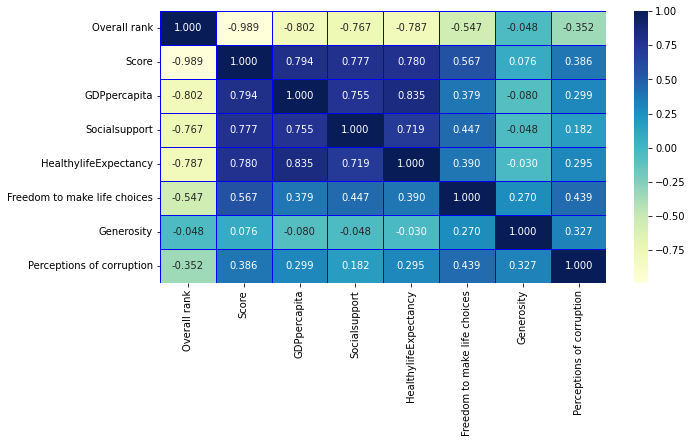

In [4]:
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(df2019.corr(), annot=True, linewidths=0.5,linecolor="blue", fmt= '.3f',ax=ax,cmap= 'YlGnBu')
plt.show()
            

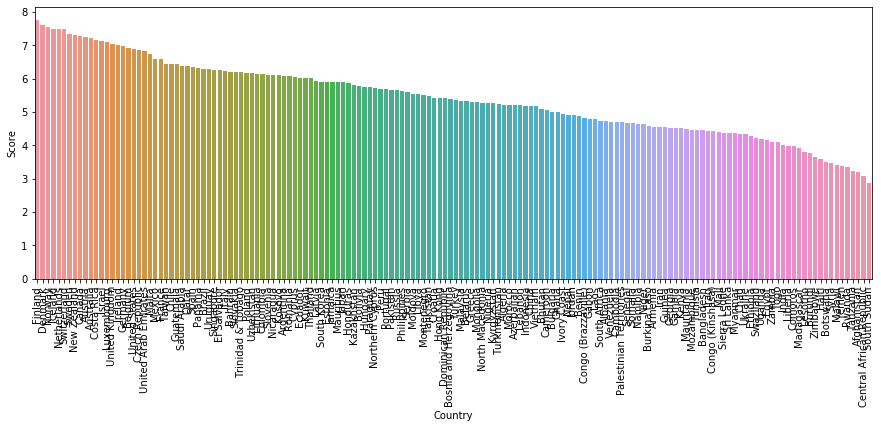

In [34]:
plt.figure(figsize = (15,5))
sns.barplot(x = df2019.Country , y = df2019.Score)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Score')
plt.show()

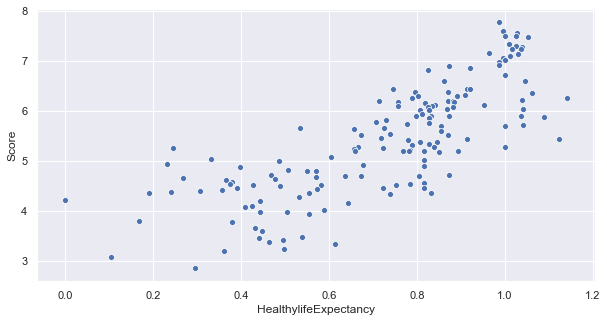

In [24]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='HealthylifeExpectancy',y='Score',data=df2019)
plt.show()

<Figure size 360x144 with 0 Axes>

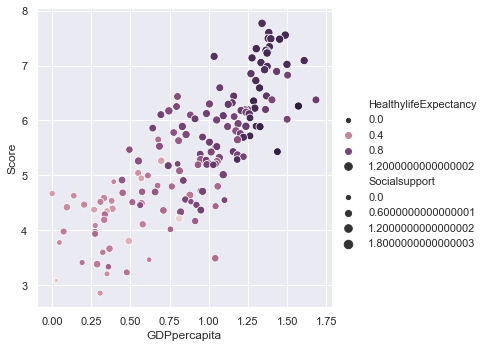

In [26]:
plt.figure(figsize = (5,2))
sns.set(style = "darkgrid")
sns.relplot(x='GDPpercapita',y='Score',hue = 'HealthylifeExpectancy', 
            size = 'Socialsupport',data=df2019)
plt.show()

In [7]:

fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(x=df2019.Socialsupport, name='2019socialsupport'))
fig.add_trace(go.Box(x=df2019.GDPpercapita, name='2019GDP'))
fig.add_trace(go.Box(x=df2019.HealthylifeExpectancy, name='2019lifeExpectancy'))

fig.show()

In [8]:
#my home country Uganda vs Japan
categories = ['Score', 'GDPpercapita',
       'Socialsupport', 'HealthylifeExpectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
r1=[df2019[each][df2019["Country"]=="Japan"].mean()/df2019[each].max()  for each in categories]
r2=[df2019[each][df2019["Country"]=="Uganda"].mean()/df2019[each].max()  for each in categories]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r1,
      theta=categories,
      fill='toself',
      name='Japan'
))
fig.add_trace(go.Scatterpolar(
      r=r2,
      theta=categories,
      fill='toself',
      name='Uganda'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()



In [21]:
df2019.dtypes

Overall rank                      int64
Country                          object
Region                           object
Score                           float64
GDPpercapita                    float64
Socialsupport                   float64
HealthylifeExpectancy           float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [22]:
df2019['Region'].value_counts()

Europe           45
Africa           44
Asia             43
North America    12
South America    10
Ocenia            2
Name: Region, dtype: int64

In [12]:
df2019['Type']= df2019['Region'].apply(lambda x : 'Africa'if re.search('Africa', x,)else 'OTHERS')
df2019['Type'].value_counts()

OTHERS    112
Africa     44
Name: Type, dtype: int64

In [22]:
df2019.groupby(['Region', 'Type']).size()

Region         Type  
Africa         Africa    44
Asia           OTHERS    43
Europe         OTHERS    45
North America  OTHERS    12
Ocenia         OTHERS     2
South America  OTHERS    10
dtype: int64

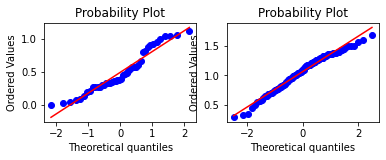

In [13]:
#lets create  a data point
x = df2019[df2019['Type'] == 'Africa']['GDPpercapita']
y = df2019[df2019['Type'] == 'OTHERS']['GDPpercapita']

plt.subplot(221)
stats.probplot(x, dist = "norm", plot = plt)
plt.subplot(222)
stats.probplot(y, dist = "norm", plot = plt)

plt.show()

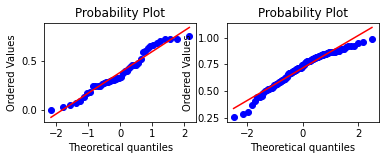

In [14]:
x = (x+1).apply(np.log)
y = (y+1).apply(np.log)

# QQ plot with logrithmic data
plt.subplot(221)
stats.probplot(x, dist="norm", plot=plt)
plt.subplot(222)
stats.probplot(y, dist="norm", plot=plt)
plt.show()


/home/chkasoma/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/chkasoma/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='GDPpercapita', ylabel='Density'>

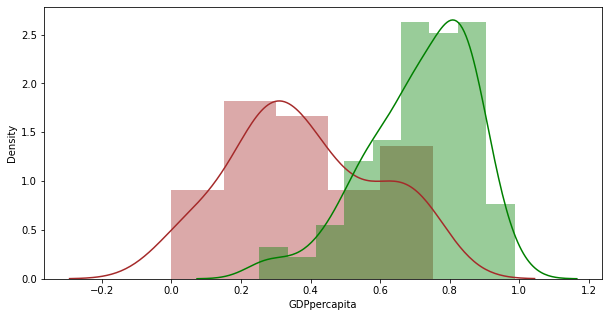

In [19]:
plt.figure(figsize = (10,5))
sns.distplot(x, color = "brown")
sns.distplot(y, color = "green")


In [20]:
africa = df2019[df2019['Type'] == 'Africa']['GDPpercapita']
others = df2019[df2019['Type'] == 'OTHERS']['GDPpercapita']

africa = africa[africa > 0]
others = others[others > 0]
africa = (africa+1).apply(np.log)
others = (others+1).apply(np.log)

print('Mean for AfricaGDP:  {}'.format(africa.mean()))
print('Mean for othersGDP:  {}'.format(others.mean()))


Mean for AfricaGDP:  0.38890433398853963
Mean for othersGDP:  0.7147669833912652


In [21]:
#p-value for Africa vs the world(null hypothesis testing)
stats.ttest_ind(a = africa,
               b = others,
               equal_var = False)

Ttest_indResult(statistic=-9.56059802931239, pvalue=9.038695154174939e-14)